In [2]:
# 載入資料與初始化環境
import pandas as pd
from load_data import load_products, load_reviews, load_users
from recommend import recommend_by_aspects

# 載入資料
products_df = load_products()
reviews_df = load_reviews()
users_df = load_users()

# 預覽資料
print("資料載入完成")
print(f"產品數量：{len(products_df)}")
print(f"評論數量：{len(reviews_df)}")
print(f"使用者數量：{len(users_df)}")

# 顯示第一筆使用者購買紀錄
print(users_df.head(1))


資料載入完成
產品數量：6
評論數量：15
使用者數量：15
  user_id product_id purchased_at
0   U1001       P101   2023-03-21


In [4]:
recommendations = recommend_by_aspects("U1001")

if not recommendations:  # 如果推薦結果為空，顯示提示訊息
    print(f" No recommendations available for user U1001.")
else:
    for aspect, df in recommendations.items():
        print(f"\n Recommendation for aspect: {aspect}")
        print(df)


📱 User U1001 purchased Aphone 11
[DEBUG] aspect=battery | sentiment=positive | user spec = 4000
  product_id          name  battery  price  price_diff
1       P102      Bphone X     5000  10200         201
2       P103    Cphone Pro     4800  10500         501
3       P104   Dphone Lite     3500   4500        5499
4       P105    Ephone Max     4100   5200        4799
5       P106  Fphone Ultra     4200   6000        3999
[DEBUG] aspect=camera | sentiment=positive | user spec = 12
  product_id         name  camera  price  price_diff
1       P102     Bphone X      16  10200         201
3       P104  Dphone Lite       8   4500        5499
4       P105   Ephone Max      16   5200        4799

 Recommendation for aspect: battery
  product_id          name  battery  price
1       P102      Bphone X     5000  10200
2       P103    Cphone Pro     4800  10500
5       P106  Fphone Ultra     4200   6000

 Recommendation for aspect: camera
  product_id         name  camera  price
1       P102    

In [8]:
from explain import generate_explanations
from load_data import load_reviews
from load_data import load_products

user_id = "U1001"
recommendations = recommend_by_aspects(user_id)
user_phone = load_products().set_index("product_id").loc["P101"]
reviews_df = load_reviews()

explanations = generate_explanations(user_phone, recommendations, reviews_df)

for aspect, reasons in explanations.items():
    print(f"\n 推薦理由（{aspect}）:")
    for r in reasons:
        print(" -", r)


📱 User U1001 purchased Aphone 11
[DEBUG] aspect=battery | sentiment=positive | user spec = 4000
  product_id          name  battery  price  price_diff
1       P102      Bphone X     5000  10200         201
2       P103    Cphone Pro     4800  10500         501
3       P104   Dphone Lite     3500   4500        5499
4       P105    Ephone Max     4100   5200        4799
5       P106  Fphone Ultra     4200   6000        3999
[DEBUG] aspect=camera | sentiment=positive | user spec = 12
  product_id         name  camera  price  price_diff
1       P102     Bphone X      16  10200         201
3       P104  Dphone Lite       8   4500        5499
4       P105   Ephone Max      16   5200        4799

 推薦理由（battery）:
 - Bphone X 的 battery 表現更佳（5000 > 4000），其他人評論：「Battery lasts 2 days, great for travel」
 - Cphone Pro 的 battery 表現更佳（4800 > 4000）
 - Fphone Ultra 的 battery 表現更佳（4200 > 4000）

 推薦理由（camera）:
 - Bphone X 的 camera 表現更佳（16 > 12）
 - Ephone Max 的 camera 表現更佳（16 > 12）
 - Dphone Lite 的 camera 

In [9]:
from output import generate_reason_table
table_df = generate_reason_table(recommendations, explanations)
display(table_df[["aspect", "name", "price", "reason"]])


,aspect,name,price,reason
0,battery,Bphone X,10200,Bphone X 的 battery 表現更佳（5000 > 4000），其他人評論：「Ba...
1,battery,Cphone Pro,10500,Cphone Pro 的 battery 表現更佳（4800 > 4000）
2,battery,Fphone Ultra,6000,Fphone Ultra 的 battery 表現更佳（4200 > 4000）
3,camera,Bphone X,10200,Bphone X 的 camera 表現更佳（16 > 12）
4,camera,Ephone Max,5200,Ephone Max 的 camera 表現更佳（16 > 12）
5,camera,Dphone Lite,4500,Dphone Lite 的 camera 表現與你目前使用的手機相近（8 ≈ 12）


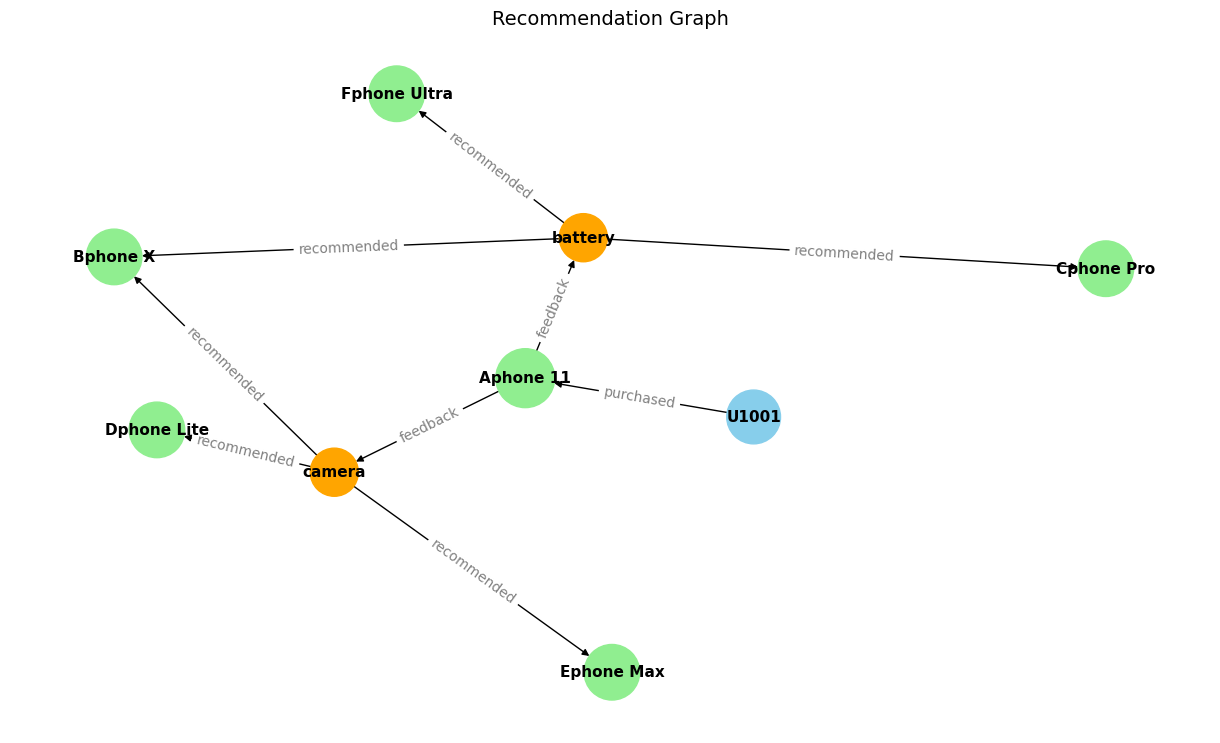

In [11]:
from graph_export import build_recommendation_graph, draw_graph

G = build_recommendation_graph("U1001", "Aphone 11", recommendations)
draw_graph(G, focus_product="Aphone 11")
